                                           Game Name  Rating   #Reviews  \
0                                               PEAK       7     77,683   
1                                     Cyberpunk 2077       7    772,574   
2                                               Rust       7  1,038,433   
3  Microsoft Flight Simulator (2020) 40th Anniver...       5     63,905   
4                       Sid Meier's Civilization VII       4     34,643   

   Discount%  Price (€)  Original Price (€)  Release Date  Unnamed: 7  \
0        -38       4.64                7.49  16 Jun, 2025         NaN   
1        -65      20.99               59.99   9 Dec, 2020         NaN   
2        -50      19.99               39.99   8 Feb, 2018         NaN   
3        -60      27.99               69.99  17 Aug, 2020         NaN   
4        -30      48.99               69.99  10 Feb, 2025         NaN   

   Unnamed: 8  Unnamed: 9  Unnamed: 10  
0         NaN         NaN          NaN  
1         NaN         NaN   

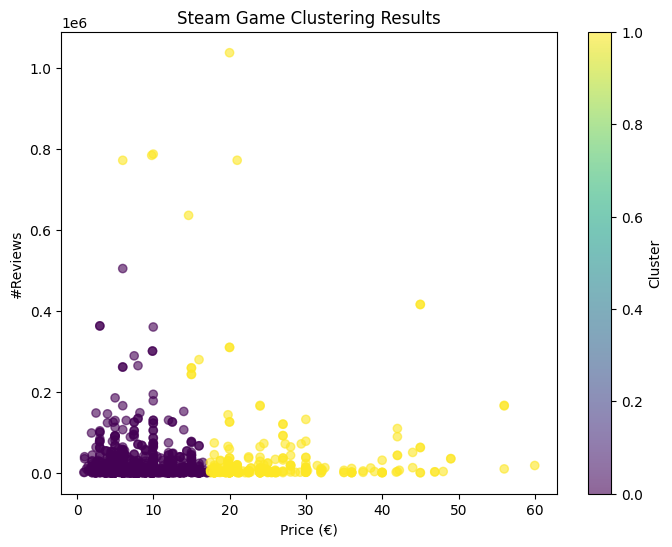

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 1. Load data
df = pd.read_csv("/content/steam_sales.csv")

# 2. Lihat beberapa baris awal
print(df.head())

# Clean '#Reviews' column by removing commas and converting to numeric
df['#Reviews'] = df['#Reviews'].astype(str).str.replace(',', '', regex=False)
df['#Reviews'] = pd.to_numeric(df['#Reviews'])

# 3. Pilih fitur relevan untuk clustering
# (misalnya: harga, jumlah review)
# -> sesuaikan dengan nama kolom sebenarnya di CSV
selected_features = df[['Price (€)', '#Reviews']]

# 4. Normalisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(selected_features)

# 5. Clustering with KMeans (Unsupervised Learning)
# We are using KMeans, an unsupervised learning algorithm, to group similar games
kmeans = KMeans(n_clusters=2, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# 6. Tampilkan hasil cluster
print(df[['Game Name', 'Price (€)', '#Reviews', 'Rating', 'cluster']].head())

# 7. Visualisasi clustering (2D: price vs positive_ratings)
plt.figure(figsize=(8,6))
plt.scatter(df['Price (€)'], df['#Reviews'], c=df['cluster'], cmap='viridis', alpha=0.6)
plt.xlabel('Price (€)')
plt.ylabel('#Reviews')
plt.title('Steam Game Clustering Results') # Added a title for clarity
plt.colorbar(label='Cluster')
plt.show()

Descriptive statistics for Original Price (€):


,Original Price (€)
count,1435.000000
mean,27.401561
std,15.393513
min,2.990000
25%,14.990000
50%,24.990000
75%,34.990000
max,99.990000



Descriptive statistics for #Reviews:


,#Reviews
count,1.435000e+03
mean,2.262054e+04
std,6.774609e+04
min,1.300000e+01
25%,1.128000e+03
50%,4.091000e+03
75%,1.696550e+04
max,1.038433e+06


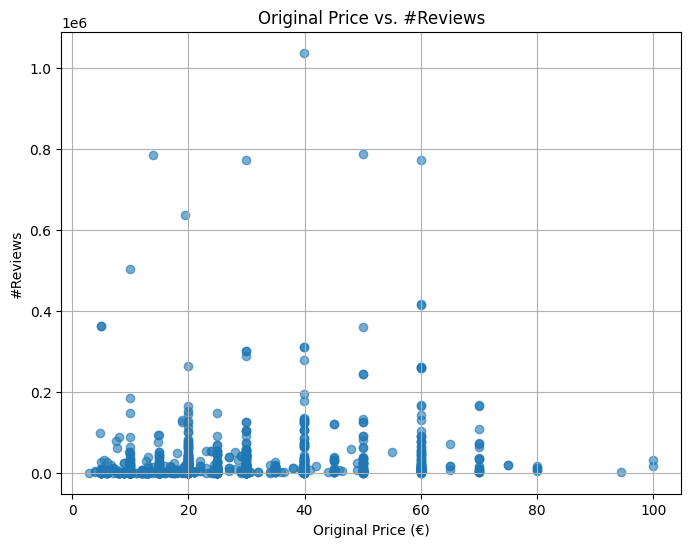

In [ ]:
# Evaluate 'Original Price (€)' and '#Reviews'
print("Descriptive statistics for Original Price (€):")
display(df['Original Price (€)'].describe())

print("\nDescriptive statistics for #Reviews:")
display(df['#Reviews'].describe())

# Visualize the relationship between 'Original Price (€)' and '#Reviews'
plt.figure(figsize=(8, 6))
plt.scatter(df['Original Price (€)'], df['#Reviews'], alpha=0.6)
plt.xlabel('Original Price (€)')
plt.ylabel('#Reviews')
plt.title('Original Price vs. #Reviews')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

# Calculate Inertia
inertia = kmeans.inertia_
print(f"Inertia (Within-cluster sum of squares): {inertia}")

# Calculate Silhouette Score
# The silhouette score requires at least 2 clusters and more than 1 sample
if len(df['cluster'].unique()) > 1 and len(X_scaled) > 1:
  silhouette_avg = silhouette_score(X_scaled, df['cluster'])
  print(f"Silhouette Score: {silhouette_avg}")
else:
  print("Silhouette Score cannot be calculated with the current number of clusters or samples.")

Inertia (Within-cluster sum of squares): 1947.5084365182909
Silhouette Score: 0.5666075081769532


In [ ]:
# Examine the characteristics of each cluster
cluster_characteristics = df.groupby('cluster')[['Price (€)', '#Reviews', 'Rating', 'Discount%']].mean()
print("Characteristics of each cluster (mean values):")
display(cluster_characteristics)

Characteristics of each cluster (mean values):


,Price (€),#Reviews,Rating,Discount%
cluster,,,,
0,8.637531,18098.159213,6.477639,-55.936494
1,24.906562,38570.119874,6.334385,-36.955836


Inertia and Silhouette Scores for different numbers of clusters:


,Number of Clusters,Inertia,Silhouette Score
0,1,2870.000000,NaN
1,2,1939.280822,0.806358
2,3,1045.396510,0.579957
3,4,796.212287,0.486804
4,5,550.275170,0.506291
5,6,442.199621,0.519952
6,7,335.981736,0.480267
7,8,287.659096,0.472456


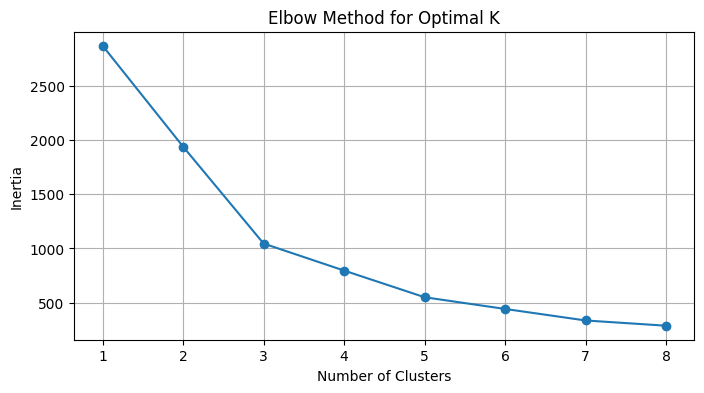

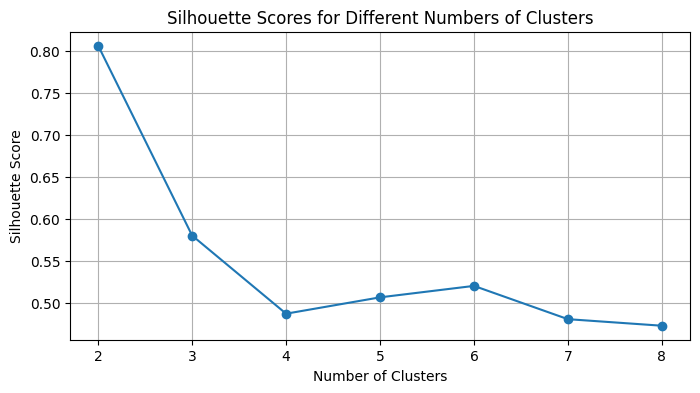

In [ ]:
# Calculate inertia and silhouette scores for a range of cluster numbers
inertia_scores = []
silhouette_scores = []
cluster_range = range(1, 9) # From 1 to 8 clusters

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10) # Added n_init for robustness
    kmeans.fit(X_scaled)
    inertia_scores.append(kmeans.inertia_)

    if n_clusters > 1: # Silhouette score is not defined for 1 cluster
        silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
        silhouette_scores.append(silhouette_avg)
    else:
        silhouette_scores.append(None) # Append None for 1 cluster

# Display the results
results_df = pd.DataFrame({
    'Number of Clusters': cluster_range,
    'Inertia': inertia_scores,
    'Silhouette Score': silhouette_scores
})

print("Inertia and Silhouette Scores for different numbers of clusters:")
display(results_df)

# Optional: Plotting the inertia (Elbow Method)
plt.figure(figsize=(8, 4))
plt.plot(cluster_range, inertia_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()

# Optional: Plotting the silhouette scores
plt.figure(figsize=(8, 4))
plt.plot(cluster_range[1:], silhouette_scores[1:], marker='o') # Exclude the first point (k=1)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xticks(cluster_range[1:])
plt.grid(True)
plt.show()

In [ ]:
# --- Clustering and Characteristics for 2 Clusters ---
kmeans_2 = KMeans(n_clusters=2, random_state=42, n_init=10)
df['cluster_2'] = kmeans_2.fit_predict(X_scaled)
cluster_characteristics_2 = df.groupby('cluster_2')[['Price (€)', '#Reviews', 'Rating', 'Discount%']].mean()
print("Characteristics for 2 Clusters (mean values):")
display(cluster_characteristics_2)

Characteristics for 2 Clusters (mean values):


,Price (€),#Reviews,Rating,Discount%
cluster_2,,,,
0,12.195504,15363.816312,6.430496,-51.612057
1,14.259200,431899.560000,7.320000,-59.160000


In [ ]:
# --- Clustering and Characteristics for 4 Clusters ---
kmeans_4 = KMeans(n_clusters=4, random_state=42, n_init=10)
df['cluster_4'] = kmeans_4.fit_predict(X_scaled)
cluster_characteristics_4 = df.groupby('cluster_4')[['Price (€)', '#Reviews', 'Rating', 'Discount%']].mean()
print("\nCharacteristics for 4 Clusters (mean values):")
display(cluster_characteristics_4)


Characteristics for 4 Clusters (mean values):


,Price (€),#Reviews,Rating,Discount%
cluster_4,,,,
0,6.753995,17269.556104,6.473490,-60.114673
1,16.576419,9979.152918,6.404427,-41.472837
2,14.259200,431899.560000,7.320000,-59.160000
3,34.114608,26448.352941,6.215686,-33.411765


In [ ]:
# --- Clustering and Characteristics for 6 Clusters ---
kmeans_6 = KMeans(n_clusters=6, random_state=42, n_init=10)
df['cluster_6'] = kmeans_6.fit_predict(X_scaled)
cluster_characteristics_6 = df.groupby('cluster_6')[['Price (€)', '#Reviews', 'Rating', 'Discount%']].mean()
print("\nCharacteristics for 6 Clusters (mean values):")
display(cluster_characteristics_6)


Characteristics for 6 Clusters (mean values):


,Price (€),#Reviews,Rating,Discount%
cluster_6,,,,
0,35.136813,25440.483516,6.153846,-33.054945
1,7.386026,9250.064439,6.390215,-57.488067
2,13.561667,798705.000000,7.666667,-55.000000
3,8.250241,100106.192771,7.277108,-71.180723
4,17.899372,8260.123116,6.402010,-39.402010
5,14.479474,316066.263158,7.210526,-60.473684
